# Nueva sesión de testing 

## Esta vez trataremos un csv que contiene datos de sesiones de usuarios, visualizaciones de pantalla y total de eventos.
## Simplemente es un archivo para hacer pruebas y el objetivo será aplicar un algoritmo de aprendizaje no supervisado (clustering) para detectar sesiones atípicas.

Usaremos python y más adelante repetiremos el proceso con pyspark

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.style.use("ggplot")

In [14]:
df = pd.read_csv('./screenViewsAndTotalEvents.csv', index_col=0)

In [15]:
df.head()

,Visualizaciones de pantalla,Total de eventos
Session Id,,
1505755687157,179,178
1506093196536,168,126
1505717973545,165,165
1506098923333,144,29
1506077834275,134,106


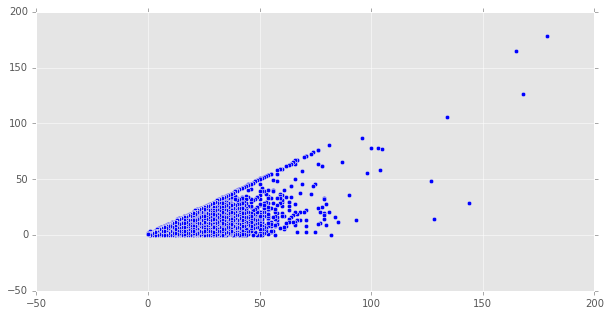

In [16]:
#ahora vamos a pintarlo. 

f, ax = plt.subplots(figsize = (10,5))
plt.scatter(df['Visualizaciones de pantalla'],df['Total de eventos'])

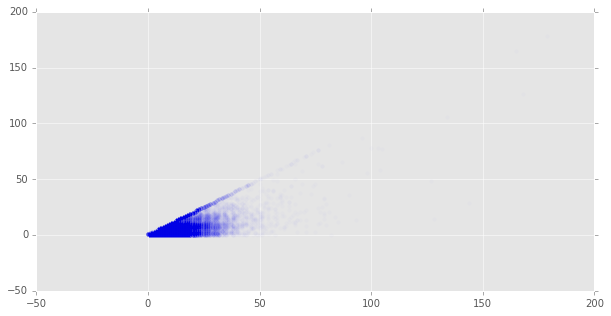

In [21]:
f, ax = plt.subplots(figsize = (10,5))
plt.scatter(df['Visualizaciones de pantalla'],df['Total de eventos'], alpha=0.01)

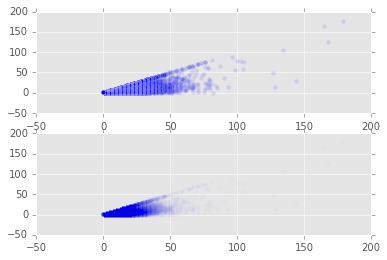

In [22]:
f, (ax1,ax2) = plt.subplots(nrows=2, sharey=True)

ax1.scatter(df['Visualizaciones de pantalla'],df['Total de eventos'],alpha=0.1)
ax2.scatter(df['Visualizaciones de pantalla'],df['Total de eventos'],alpha=0.01)

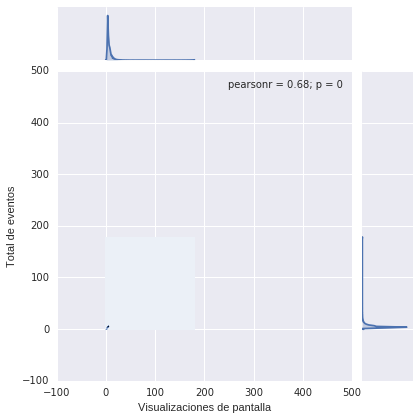

In [23]:
import seaborn as sns

(sns.jointplot(x="Visualizaciones de pantalla",y="Total de eventos",
               data=df,kind="kde",xlim=(-100,500),ylim=(-100,500)))

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans()

In [26]:
type(df)

pandas.core.frame.DataFrame

In [27]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
kmeans.cluster_centers_

array([[  1.39750089,   0.23661242],
       [ 15.9750465 ,  12.80626162],
       [  5.93684132,   0.61164488],
       [ 27.10901468,   7.098233  ],
       [ 13.10928703,   2.4644106 ],
       [  2.94581856,   2.34455903],
       [  7.33239893,   5.85608812],
       [ 45.70662906,  29.80535966]])

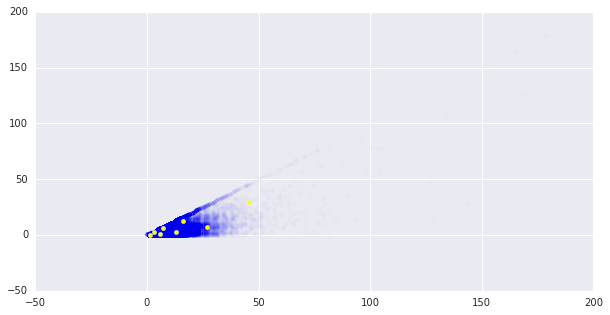

In [29]:
f, ax = plt.subplots(figsize = (10,5))
plt.scatter(df['Visualizaciones de pantalla'],df['Total de eventos'],alpha=0.01)
plt.scatter(*zip(*kmeans.cluster_centers_),c="yellow")

In [30]:
# Cuantos cluster elegimos?
# Kmeans elige por defecto 8, pero podemos decidirlo nosotros

In [33]:
ks = range (1,15)
fits = [KMeans(n_clusters=k).fit(df) for k in ks]
centroids = [kmeans.cluster_centers_ for kmeans in fits]

In [34]:
centroids

[array([[ 3.74409358,  1.46828191]]), array([[  2.6736314 ,   0.96121449],
        [ 14.86422232,   6.73577768]]), array([[  2.10035912,   0.72401005],
        [  8.88855805,   3.64333541],
        [ 24.25793318,  12.00431086]]), array([[  1.75827782,   0.61200969],
        [ 14.60690848,   6.53356687],
        [ 33.18421053,  17.65931721],
        [  6.43617819,   2.4130129 ]]), array([[  1.50730006,   0.45228836],
        [ 10.13139908,   4.63218138],
        [ 42.47951583,  24.75791434],
        [ 20.28732394,   9.28408972],
        [  4.87155899,   1.79505113]]), array([[  1.68695845,   0.47481955],
        [ 12.8398818 ,   5.60644536],
        [  4.64753911,   3.91827547],
        [ 23.31034483,  10.96650246],
        [  7.09114549,   0.75985687],
        [ 46.4939759 ,  27.81659973]]), array([[  4.35491308,   2.692089  ],
        [ 54.99193548,  34.21505376],
        [ 10.24797844,   8.08168288],
        [  1.61861417,   0.43188127],
        [ 26.97688204,  15.20835803],
        

In [37]:
from scipy.spatial.distance import cdist

dists_centroids = [cdist(df, centers, 'euclidean') for centers in centroids]

In [38]:
[x.shape for x in dists_centroids]

[(391354, 1),
 (391354, 2),
 (391354, 3),
 (391354, 4),
 (391354, 5),
 (391354, 6),
 (391354, 7),
 (391354, 8),
 (391354, 9),
 (391354, 10),
 (391354, 11),
 (391354, 12),
 (391354, 13),
 (391354, 14)]

In [39]:
import numpy as np

In [40]:
np.min(dists_centroids[2], axis=1).shape

(391354,)

In [41]:
dists = [np.average(np.min(fit, axis=1)) for fit in dists_centroids]

In [42]:
dists

[3.5064760894199996,
 2.5572642363584031,
 2.0853151443693978,
 1.8274511813241716,
 1.6557908529695551,
 1.5465541237426046,
 1.4766006459009715,
 1.2621094352933229,
 1.2797396700174748,
 1.0816084493186855,
 1.0590069395485155,
 1.0634036182744306,
 0.98727973667932079,
 0.99477640413420632]

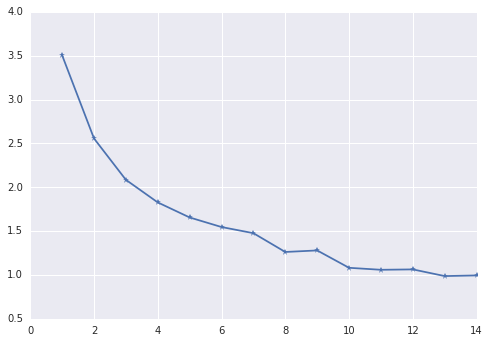

In [43]:
plt.plot(ks, dists, '-*')

In [45]:
kmeans2 = KMeans(n_clusters=5)
kmeans2.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

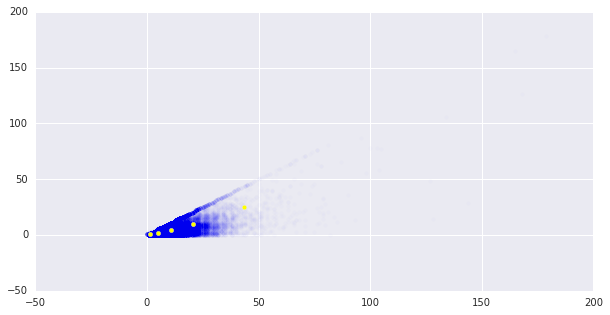

In [46]:
f, ax = plt.subplots(figsize = (10,5))
plt.scatter(df['Visualizaciones de pantalla'],df['Total de eventos'],alpha=0.01)
plt.scatter(*zip(*kmeans2.cluster_centers_),c="yellow")

In [49]:
fits[4]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [50]:
model_5_clusters = fits[4]
predictions = model_5_clusters.predict(df)

In [51]:
predictions

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [52]:
xs = df.values[:,0]
ys = df.values[:,1]

In [53]:
xs.shape

(391354,)

In [54]:
df2 = pd.DataFrame({'Visualizaciones de pantalla': xs, 'Total de eventos': ys, 'cluster': predictions})

In [55]:
cluster_stats = df2.groupby('cluster')['Visualizaciones de pantalla','Total de eventos'].agg(['mean','std'])

In [56]:
merged = df2.merge(cluster_stats, left_on='cluster', right_index=True)
merged.head()

/home/dsc/anaconda2/lib/python2.7/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,Total de eventos,Visualizaciones de pantalla,cluster,"(Visualizaciones de pantalla, mean)","(Visualizaciones de pantalla, std)","(Total de eventos, mean)","(Total de eventos, std)"
0,178,179,2,42.479516,15.421873,24.757914,15.320407
1,126,168,2,42.479516,15.421873,24.757914,15.320407
2,165,165,2,42.479516,15.421873,24.757914,15.320407
3,29,144,2,42.479516,15.421873,24.757914,15.320407
4,106,134,2,42.479516,15.421873,24.757914,15.320407


In [57]:
merged['visualizaciones_zscore'] = ((merged['Visualizaciones de pantalla'] -
                                     merged[('Visualizaciones de pantalla', 'mean')]) / 
                                     merged[('Visualizaciones de pantalla', 'std')])

merged['Eventos_zscore'] = ((merged['Total de eventos'] -
                             merged[('Total de eventos','mean')]) /
                             merged[('Total de eventos','std')])
merged.sample(10)

,Total de eventos,Visualizaciones de pantalla,cluster,"(Visualizaciones de pantalla, mean)","(Visualizaciones de pantalla, std)","(Total de eventos, mean)","(Total de eventos, std)",visualizaciones_zscore,Eventos_zscore
345966,0,1,0,1.507300,0.679902,0.452288,0.685190,-0.746137,-0.660092
218931,0,2,0,1.507300,0.679902,0.452288,0.685190,0.724663,-0.660092
240174,1,2,0,1.507300,0.679902,0.452288,0.685190,0.724663,0.799357
282581,1,1,0,1.507300,0.679902,0.452288,0.685190,-0.746137,0.799357
286232,0,1,0,1.507300,0.679902,0.452288,0.685190,-0.746137,-0.660092
71894,6,6,1,10.131399,2.680364,4.632181,3.059997,-1.541357,0.447000
25645,10,10,1,10.131399,2.680364,4.632181,3.059997,-0.049023,1.754191
304359,0,1,0,1.507300,0.679902,0.452288,0.685190,-0.746137,-0.660092
15186,2,13,1,10.131399,2.680364,4.632181,3.059997,1.070228,-0.860191
192523,0,2,0,1.507300,0.679902,0.452288,0.685190,0.724663,-0.660092


In [58]:
merged['zscore'] = np.sqrt(merged['visualizaciones_zscore'] ** 2 + merged['Eventos_zscore']**2)

In [59]:
merged.sample(10)

,Total de eventos,Visualizaciones de pantalla,cluster,"(Visualizaciones de pantalla, mean)","(Visualizaciones de pantalla, std)","(Total de eventos, mean)","(Total de eventos, std)",visualizaciones_zscore,Eventos_zscore,zscore
356100,0,1,0,1.507300,0.679902,0.452288,0.685190,-0.746137,-0.660092,0.996214
123433,1,4,4,4.871559,1.568122,1.795051,1.603836,-0.555798,-0.495719,0.744747
307500,0,1,0,1.507300,0.679902,0.452288,0.685190,-0.746137,-0.660092,0.996214
169033,3,3,4,4.871559,1.568122,1.795051,1.603836,-1.193503,0.751292,1.410280
321482,0,1,0,1.507300,0.679902,0.452288,0.685190,-0.746137,-0.660092,0.996214
188632,2,2,0,1.507300,0.679902,0.452288,0.685190,0.724663,2.258807,2.372203
307747,0,1,0,1.507300,0.679902,0.452288,0.685190,-0.746137,-0.660092,0.996214
384136,0,1,0,1.507300,0.679902,0.452288,0.685190,-0.746137,-0.660092,0.996214
294202,0,1,0,1.507300,0.679902,0.452288,0.685190,-0.746137,-0.660092,0.996214
132027,2,3,4,4.871559,1.568122,1.795051,1.603836,-1.193503,0.127787,1.200325


In [62]:
merged['outlier'] =  merged['zscore']>3
sum(merged['outlier'])

281

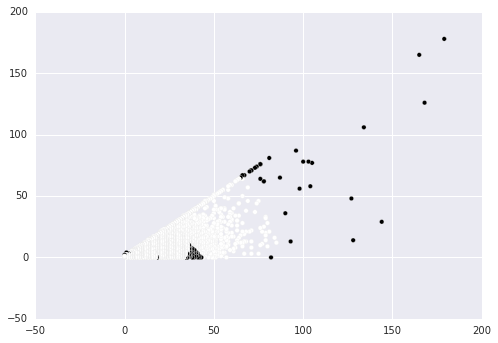

In [63]:
plt.scatter(merged['Visualizaciones de pantalla'],merged['Total de eventos'], c=merged['outlier'])

# NUEVA SESIÓN!

## Como prometí esta vez usaré pyspark

In [1]:
sc

In [2]:
f = sc.textFile('../../Archivos_tfm/dataTesting/screenViewsAndTotalEvents.csv')

In [3]:
f.take(3)

[u'Session Id,Visualizaciones de pantalla,Total de eventos',
 u'1505755687157,179,178',
 u'1506093196536,168,126']

In [6]:
# Creamos una función que nos separa cada columna y convierta las columnas que nos
# interesan en formato float
def splitAndFloat (row, delim = ','):
    """
    :param row: sesión de entrada como un string separado por comas
    :return una lista con id de sesiín y duración de la sesión en segundos.
    
    """
    
    out = row.split(delim)
    return [float(out[1]),float(out[2])]

# También necesitamos asignar el header a una variable para luego hacer un filter
# Y poder prescindir de él.

header = f.first()

In [7]:
data = f.filter(lambda line: line != header).map(splitAndFloat)

In [8]:
data.first()

[179.0, 178.0]

In [9]:
# Importamos la librería para hacer clustering
from pyspark.mllib.clustering import KMeans

In [10]:
# Esta vez elegiremos 4 clusters
clusters = KMeans.train(data,4)

In [11]:
clusters.centers

[array([ 1.86394212,  0.61315666]),
 array([ 34.98314856,  19.42350333]),
 array([ 15.77916492,   6.91318716]),
 array([ 6.88692485,  2.79745197])]

In [12]:
clusters.predict(sc.parallelize([[200,100]])).collect()

[1]

In [15]:
clusters.predict(sc.parallelize([[6,2]])).collect()

[3]

In [16]:
# Ahora escribimos otra función que anotará cada punto con el cluster al que pertence en la forma (key, value),
# que nos permitirá hacer groupByKey() y luego sumarizar cada cluster con mapValues.

In [21]:
from math import sqrt
import numpy as np

def annotate_with_cluster(point):
    visualizaciones, eventos = point
    
    
    distances = ([sqrt(
                        (visualizaciones - visualizaciones_centroid)**2 +
                        (eventos - eventos_centroid)**2)
                  for visualizaciones_centroid, eventos_centroid in clusters.centers]
                )
    cluster = distances.index(min(distances))
    
    return (cluster, point)

In [22]:
annotate_with_cluster(np.array([2.5,8.5]))

(3, array([ 2.5,  8.5]))

In [23]:
points_with_cluster = data.map(annotate_with_cluster)
points_with_cluster

PythonRDD[90] at RDD at PythonRDD.scala:48

In [24]:
def stats (iterable):
    views, events = zip(*iterable)
    return np.mean(views), np.std(views), np.mean(events), np.std(events)

In [25]:
groups = points_with_cluster.groupByKey().mapValues(stats)

In [26]:
clusterdict = dict(groups.collect())

In [27]:
# Por ultimo, anotamos cada punt con su valor de outlier:
# True si está a más de 3 stds de la media y False si no.

In [28]:
def outlier(annotated_point):
    cluster, (views, events) = annotated_point
    this_views_mean, this_views_std, this_events_mean, this_events_std = clusterdict[cluster]
    
    zscore_views = (views - this_views_mean) / this_views_std
    zscore_events = (events - this_events_mean) / this_events_std
    
    zscore_squared = zscore_views ** 2 + zscore_events ** 2
    outlier = zscore_squared > 9
    return outlier, views, events

In [30]:
points_with_cluster.map(outlier).take(150)

[(True, 179.0, 178.0),
 (True, 168.0, 126.0),
 (True, 165.0, 165.0),
 (True, 144.0, 29.0),
 (True, 134.0, 106.0),
 (True, 128.0, 14.0),
 (True, 127.0, 48.0),
 (True, 105.0, 77.0),
 (True, 104.0, 58.0),
 (True, 103.0, 78.0),
 (True, 100.0, 78.0),
 (True, 98.0, 56.0),
 (True, 96.0, 87.0),
 (True, 93.0, 13.0),
 (True, 90.0, 36.0),
 (True, 87.0, 65.0),
 (True, 85.0, 12.0),
 (True, 84.0, 16.0),
 (True, 82.0, 0.0),
 (True, 81.0, 81.0),
 (True, 81.0, 21.0),
 (True, 80.0, 28.0),
 (True, 80.0, 9.0),
 (True, 79.0, 20.0),
 (True, 79.0, 14.0),
 (True, 79.0, 18.0),
 (True, 79.0, 33.0),
 (True, 79.0, 32.0),
 (True, 78.0, 25.0),
 (True, 78.0, 62.0),
 (True, 78.0, 62.0),
 (True, 77.0, 11.0),
 (True, 77.0, 21.0),
 (True, 76.0, 76.0),
 (True, 76.0, 76.0),
 (True, 76.0, 76.0),
 (True, 76.0, 64.0),
 (True, 76.0, 24.0),
 (True, 76.0, 10.0),
 (True, 75.0, 3.0),
 (True, 75.0, 46.0),
 (True, 74.0, 74.0),
 (True, 74.0, 44.0),
 (True, 73.0, 37.0),
 (True, 73.0, 73.0),
 (True, 71.0, 71.0),
 (False, 71.0, 8.0),
 

In [31]:
points_with_cluster.map(outlier).filter(lambda x: x[0]).take(150)

[(True, 179.0, 178.0),
 (True, 168.0, 126.0),
 (True, 165.0, 165.0),
 (True, 144.0, 29.0),
 (True, 134.0, 106.0),
 (True, 128.0, 14.0),
 (True, 127.0, 48.0),
 (True, 105.0, 77.0),
 (True, 104.0, 58.0),
 (True, 103.0, 78.0),
 (True, 100.0, 78.0),
 (True, 98.0, 56.0),
 (True, 96.0, 87.0),
 (True, 93.0, 13.0),
 (True, 90.0, 36.0),
 (True, 87.0, 65.0),
 (True, 85.0, 12.0),
 (True, 84.0, 16.0),
 (True, 82.0, 0.0),
 (True, 81.0, 81.0),
 (True, 81.0, 21.0),
 (True, 80.0, 28.0),
 (True, 80.0, 9.0),
 (True, 79.0, 20.0),
 (True, 79.0, 14.0),
 (True, 79.0, 18.0),
 (True, 79.0, 33.0),
 (True, 79.0, 32.0),
 (True, 78.0, 25.0),
 (True, 78.0, 62.0),
 (True, 78.0, 62.0),
 (True, 77.0, 11.0),
 (True, 77.0, 21.0),
 (True, 76.0, 76.0),
 (True, 76.0, 76.0),
 (True, 76.0, 76.0),
 (True, 76.0, 64.0),
 (True, 76.0, 24.0),
 (True, 76.0, 10.0),
 (True, 75.0, 3.0),
 (True, 75.0, 46.0),
 (True, 74.0, 74.0),
 (True, 74.0, 44.0),
 (True, 73.0, 37.0),
 (True, 73.0, 73.0),
 (True, 71.0, 71.0),
 (True, 71.0, 71.0),
 